# 1. Import and Install Dependencies


In [1]:
# !pip install tensorflow[and-cuda] opencv-python mediapipe scikit-learn matplotlib


In [2]:
print("Testing all imports...")
import tensorflow as tf
import cv2
import os
import time
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version

print(f"✅ TensorFlow: {tf.__version__}")
print(f"✅ OpenCV: {cv2.__version__}")
print(f"✅ NumPy: {np.__version__}")
print(f"✅ MediaPipe: {mp.__version__}")
print(f"✅ Scikit-learn: {sklearn_version}")
print(f"✅ GPU Available: {len(tf.config.list_physical_devices('GPU')) > 0}")
print("\n🎉 All packages imported successfully!")

Testing all imports...
✅ TensorFlow: 2.13.1
✅ OpenCV: 4.11.0
✅ NumPy: 1.24.3
✅ MediaPipe: 0.10.21
✅ Scikit-learn: 1.7.1
✅ GPU Available: False

🎉 All packages imported successfully!


# 2. Keypoints using MP Holistic


In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh # Face mesh model

In [4]:
# Detection function 
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
# Basic drawing function
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
# Styled drawing function
def draw_styled_landmarks(image, results):
    # Draw face connections (use mp_face_mesh.FACEMESH_CONTOURS for face outline)
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

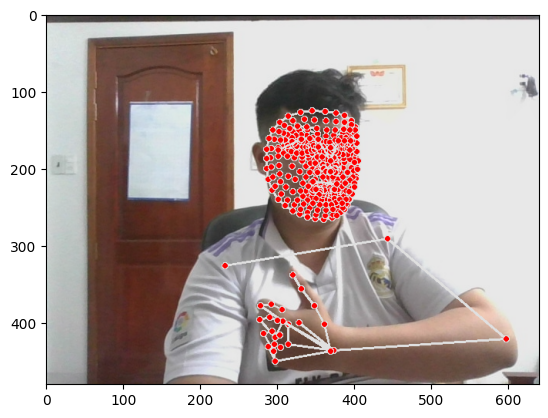

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values


In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = (
    np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
    if results.face_landmarks 
    else np.zeros(1404)
)


In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.57689059,  0.3968136 , -0.62185299, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.57689059,  0.3968136 , -0.62185299, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection


In [37]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 100 frames in length
sequence_length = 100

# Folder start
start_folder = 30

In [38]:
def get_next_sequence_id(action):
    path = os.path.join(DATA_PATH, action)
    os.makedirs(path, exist_ok=True)
    
    existing = sorted([int(f) for f in os.listdir(path) if f.isdigit()])
    
    # Nếu chưa có folder thì ID = 0
    if not existing:
        return 0
    
    # Tìm ID trống nhỏ nhất
    for i in range(existing[-1] + 1):  # Duyệt đến số lớn nhất + 1
        if i not in existing:
            return i
    return existing[-1] + 1  # Nếu không có chỗ trống thì trả về số tiếp theo


In [39]:
for action in actions:
    path = os.path.join(DATA_PATH, action)
    os.makedirs(path, exist_ok=True)   # Tạo folder action nếu chưa có

    # Nếu folder rỗng thì dirmax = 0
    if os.listdir(path):
        dirmax = np.max(np.array(os.listdir(path)).astype(int))
    else:
        dirmax = 0

    for sequence in range(1, no_sequences+1):
        try:
            os.makedirs(os.path.join(path, str(dirmax + sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing


In [22]:
# cap = cv2.VideoCapture(0)

# with mp_holistic.Holistic(min_detection_confidence=0.5, 
#                           min_tracking_confidence=0.5) as holistic:
    
#     sequence_id = 0  # đánh số video liên tục
    
#     while True:
#         # --- Menu chọn action ---
#         ret, frame = cap.read()
#         image, results = mediapipe_detection(frame, holistic)
#         draw_styled_landmarks(image, results)

#         y0 = 40
#         cv2.putText(image, "Chon hanh dong (bam so):", (15,y0), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2, cv2.LINE_AA)
        
#         for idx, act in enumerate(actions):
#             cv2.putText(image, f"{idx} - {act}", (15, y0+30*(idx+1)), 
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1, cv2.LINE_AA)

#         cv2.putText(image, "Nhan 'q' de thoat", (15, y0+30*(len(actions)+2)), 
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 1, cv2.LINE_AA)

#         cv2.imshow('OpenCV Feed', image)
#         key = cv2.waitKey(10) & 0xFF
        
#         if key == ord('q'):
#             break

#         # Nếu bấm phím số hợp lệ
#         if chr(key).isdigit() and int(chr(key)) < len(actions):
#             action = actions[int(chr(key))]

#             # --- Nhấn 's' để bắt đầu ---
#             waiting = True
#             while waiting:
#                 ret, frame = cap.read()
#                 image, results = mediapipe_detection(frame, holistic)
#                 draw_styled_landmarks(image, results)
#                 cv2.putText(image, f"Nhan 's' de quay {action} - Video {sequence_id}", 
#                             (15,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2, cv2.LINE_AA)
#                 cv2.imshow('OpenCV Feed', image)
                
#                 key2 = cv2.waitKey(10) & 0xFF
#                 if key2 == ord('s'):
#                     waiting = False
#                 if key2 == ord('q'):
#                     cap.release()
#                     cv2.destroyAllWindows()
#                     exit()

#             # --- Countdown 3 giay ---
#             for countdown in range(3, 0, -1):
#                 ret, frame = cap.read()
#                 image, results = mediapipe_detection(frame, holistic)
#                 draw_styled_landmarks(image, results)
#                 cv2.putText(image, f"Chuan bi quay {action} - Video {sequence_id}", 
#                             (15,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2, cv2.LINE_AA)
#                 cv2.putText(image, f"Bat dau sau: {countdown}", 
#                             (200,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 4, cv2.LINE_AA)
#                 cv2.imshow('OpenCV Feed', image)
#                 if cv2.waitKey(1000) & 0xFF == ord('q'):
#                     cap.release()
#                     cv2.destroyAllWindows()
#                     exit()

#             # --- Quay video ---
#             for frame_num in range(sequence_length):
#                 ret, frame = cap.read()
#                 image, results = mediapipe_detection(frame, holistic)
#                 draw_styled_landmarks(image, results)
#                 cv2.putText(image, f"QUAY: {action} - Video {sequence_id}, Frame {frame_num}", 
#                             (15,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2, cv2.LINE_AA)
#                 cv2.imshow('OpenCV Feed', image)

#                 # Lưu keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence_id), str(frame_num))
#                 os.makedirs(os.path.dirname(npy_path), exist_ok=True)
#                 np.save(npy_path, keypoints)

#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     cap.release()
#                     cv2.destroyAllWindows()
#                     exit()
            
#             sequence_id += 1  # tăng ID video lên cho lần kế tiếp

# cap.release()
# cv2.destroyAllWindows()


In [40]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        # --- Menu chọn action ---
        y0 = 40
        cv2.putText(image, "Chon hanh dong (bam so):", (15, y0),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2, cv2.LINE_AA)
        for idx, act in enumerate(actions):
            cv2.putText(image, f"{idx} - {act}", (15, y0+30*(idx+1)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1, cv2.LINE_AA)

        cv2.putText(image, "Nhan 'q' de thoat | 'n' de them action moi", 
                    (15, y0+30*(len(actions)+2)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,255), 1, cv2.LINE_AA)

        cv2.imshow('OpenCV Feed', image)
        key = cv2.waitKey(10) & 0xFF

        # --- Thoát ---
        if key == ord('q'):
            break

        # --- Thêm action mới ---
        if key == ord('n'):
            new_action = input("Nhap ten action moi: ")
            if new_action not in actions:
                actions = np.append(actions, new_action)
                print(f"Da them action: {new_action}")

        # --- Bấm số chọn action ---
        if chr(key).isdigit() and int(chr(key)) < len(actions):
            action = actions[int(chr(key))]
            sequence_id = get_next_sequence_id(action)  # Lấy ID trống nhỏ nhất

            # --- Chờ nhấn 's' ---
            waiting = True
            while waiting:
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                cv2.putText(image, f"Nhan 's' de quay {action} - Video {sequence_id}",
                            (15,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)

                key2 = cv2.waitKey(10) & 0xFF
                if key2 == ord('s'):
                    waiting = False
                if key2 == ord('q'):
                    cap.release(); cv2.destroyAllWindows(); exit()

            # --- Countdown 3 giây mượt ---
            for countdown in range(3, 0, -1):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                cv2.putText(image, f"Chuan bi quay {action} - Video {sequence_id}",
                            (15,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,255), 2, cv2.LINE_AA)
                cv2.putText(image, f"Bat dau sau: {countdown}",
                            (200,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 4, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(1000)  # Dừng 1 giây cho mượt

            # --- Quay video ---
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
                cv2.putText(image, f"QUAY: {action} - Video {sequence_id}, Frame {frame_num}",
                            (15,40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)

                # Lưu keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence_id), str(frame_num))
                os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    cap.release(); cv2.destroyAllWindows(); exit()

cap.release()
cv2.destroyAllWindows()

Da them action: a


# 6. Preprocess Data and Create Labels and Features


In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [42]:
label_map = {label:num for num, label in enumerate(actions)}

In [43]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2, 'a': 3}

In [44]:
import shutil

In [45]:
def remove_incomplete_sequences(data_path, actions, sequence_length):
    removed = {}
    for action in actions:
        action_path = os.path.join(data_path, action)
        if not os.path.exists(action_path):
            continue
        for seq in os.listdir(action_path):
            seq_path = os.path.join(action_path, seq)
            if not os.path.isdir(seq_path):
                continue
            files = os.listdir(seq_path)
            if len(files) < sequence_length:
                shutil.rmtree(seq_path)
                removed.setdefault(action, []).append(seq)
    return removed


In [46]:
def rename_sequences(data_path, actions):
    renamed = {}
    for action in actions:
        action_path = os.path.join(data_path, action)
        if not os.path.exists(action_path):
            continue

        sequences = sorted([int(s) for s in os.listdir(action_path) if s.isdigit()])
        temp_names = {}

        # Bước 1: rename tạm
        for i, seq in enumerate(sequences):
            old_path = os.path.join(action_path, str(seq))
            temp_path = os.path.join(action_path, f"temp_{i}")
            os.rename(old_path, temp_path)
            temp_names[temp_path] = os.path.join(action_path, str(i))

        # Bước 2: rename về tên chuẩn
        for temp_path, final_path in temp_names.items():
            os.rename(temp_path, final_path)
            renamed.setdefault(action, []).append((os.path.basename(temp_path), os.path.basename(final_path)))
    return renamed


In [47]:
def load_data(data_path, actions, sequence_length, label_map):
    sequences, labels = [], []
    for action in actions:
        action_path = os.path.join(data_path, action)
        if not os.path.exists(action_path):
            continue
        for seq in sorted(os.listdir(action_path), key=lambda x: int(x)):
            seq_path = os.path.join(action_path, seq)
            if not os.path.isdir(seq_path):
                continue
            window = []
            for frame_num in range(sequence_length):
                frame_path = os.path.join(seq_path, f"{frame_num}.npy")
                if os.path.exists(frame_path):
                    res = np.load(frame_path)
                    window.append(res)
            if len(window) == sequence_length:
                sequences.append(window)
                labels.append(label_map[action])

    sequences = np.array(sequences)
    labels = np.array(labels)
    print(f"Tổng sequences: {len(sequences)}")
    print(f"Kích thước sequences: {sequences.shape}")
    print(f"Kích thước labels: {labels.shape}")
    return sequences, labels


In [170]:
# 1. Xóa sequence lỗi
removed = remove_incomplete_sequences(DATA_PATH, actions, sequence_length)
if removed:
    print("Đã xóa sequence lỗi:", removed)

# 2. Đổi tên liên tục
renamed = rename_sequences(DATA_PATH, actions)
if renamed:
    print("Đã rename thư mục:", renamed)

# 3. Load dữ liệu và in thống kê
sequences, labels = load_data(DATA_PATH, actions, sequence_length, label_map)


Đã rename thư mục: {'hello': [('temp_0', '0'), ('temp_1', '1'), ('temp_2', '2'), ('temp_3', '3'), ('temp_4', '4'), ('temp_5', '5'), ('temp_6', '6'), ('temp_7', '7'), ('temp_8', '8'), ('temp_9', '9'), ('temp_10', '10')], 'thanks': [('temp_0', '0'), ('temp_1', '1'), ('temp_2', '2'), ('temp_3', '3'), ('temp_4', '4'), ('temp_5', '5'), ('temp_6', '6'), ('temp_7', '7'), ('temp_8', '8'), ('temp_9', '9'), ('temp_10', '10'), ('temp_11', '11'), ('temp_12', '12')], 'iloveyou': [('temp_0', '0'), ('temp_1', '1'), ('temp_2', '2'), ('temp_3', '3'), ('temp_4', '4'), ('temp_5', '5'), ('temp_6', '6'), ('temp_7', '7'), ('temp_8', '8'), ('temp_9', '9'), ('temp_10', '10'), ('temp_11', '11'), ('temp_12', '12')], 'a': [('temp_0', '0')]}
Tổng sequences: 38
Kích thước sequences: (38, 100, 1662)
Kích thước labels: (38,)


In [32]:
np.array(sequences).shape

(0,)

In [171]:
np.array(labels).shape

(38,)

In [172]:
X = np.array(sequences)

In [173]:
X.shape

(38, 100, 1662)

In [174]:
y = to_categorical(labels).astype(int)

In [175]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# Lấy ID từ index của X
sequence_ids = np.arange(len(X))  # ID = 0,1,2,... tương ứng với mỗi sequence

# Chia train/test theo sequence
train_seq, test_seq = train_test_split(sequence_ids, test_size=0.2, random_state=42)

X_train = X[train_seq]
y_train = y[train_seq]
X_test  = X[test_seq]
y_test  = y[test_seq]

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (30, 100, 1662) (30, 4)
Test: (8, 100, 1662) (8, 4)


In [176]:
y_test.shape

(8, 4)

# 7. Build and Train LSTM Neural Network


In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [178]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(100,1662)))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

In [179]:
model = Sequential()

In [180]:

model.add(LSTM(64, return_sequences=True, activation='tanh', recurrent_dropout=0.2, input_shape=(100, 1662)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [181]:
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [182]:
model.add(LSTM(32, return_sequences=False, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [183]:
# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(actions.shape[0], activation='softmax'))

In [206]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# # Call back
# early_stop = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=50, min_lr=1e-6)

In [207]:
# model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=2000,
    batch_size=64,
    
)
# callbacks=[early_stop, reduce_lr]

Epoch 1/2000
1/1 [==============================] - 6s 6s/step - loss: 1.2312 - categorical_accuracy: 0.3667 - val_loss: 1.3344 - val_categorical_accuracy: 0.8750
Epoch 2/2000
1/1 [==============================] - 0s 459ms/step - loss: 0.9215 - categorical_accuracy: 0.5667 - val_loss: 1.3375 - val_categorical_accuracy: 0.8750
Epoch 3/2000
1/1 [==============================] - 1s 533ms/step - loss: 0.9354 - categorical_accuracy: 0.5667 - val_loss: 1.3315 - val_categorical_accuracy: 0.8750
Epoch 4/2000
1/1 [==============================] - 1s 515ms/step - loss: 0.9360 - categorical_accuracy: 0.5667 - val_loss: 1.3153 - val_categorical_accuracy: 0.8750
Epoch 5/2000
1/1 [==============================] - 1s 511ms/step - loss: 1.0388 - categorical_accuracy: 0.6667 - val_loss: 1.2977 - val_categorical_accuracy: 0.8750
Epoch 6/2000
1/1 [==============================] - 1s 517ms/step - loss: 0.7419 - categorical_accuracy: 0.7667 - val_loss: 1.2840 - val_categorical_accuracy: 0.8750
Epoch 7

In [208]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 100, 64)           442112    
                                                                 
 batch_normalization_17 (Ba  (None, 100, 64)           256       
 tchNormalization)                                               
                                                                 
 dropout_27 (Dropout)        (None, 100, 64)           0         
                                                                 
 lstm_24 (LSTM)              (None, 100, 64)           33024     
                                                                 
 batch_normalization_18 (Ba  (None, 100, 64)           256       
 tchNormalization)                                               
                                                                 
 dropout_28 (Dropout)        (None, 100, 64)          

In [209]:
# Vẽ biểu đồ Loss và Accuracy
def plot_training_history(history):
    # Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

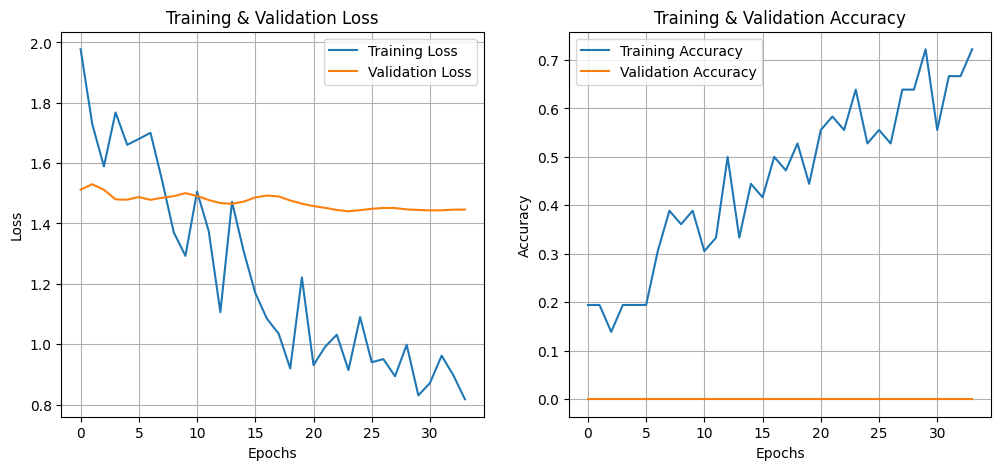

In [113]:
# Gọi hàm để vẽ biểu đồ
plot_training_history(history)

# 8. Make Predictions


In [210]:
res = model.predict(X_test)

1/1 [==============================] - 1s 897ms/step


In [211]:
# actions[np.argmax(res[4])]
actions[np.argmax(res[0])]
action_idx = np.argmax(res[0]) 
action_name = actions[action_idx]
print(action_name)


iloveyou


In [212]:
# actions[np.argmax(y_test[4])]
actions[np.argmax(y_test[0])]

'iloveyou'

# 9. Save Weights


In [213]:
model.save('latest_action.h5')

e:\CTU_ProjectOutside\AI_HandSignLanguageModel\ActionDetectionforSignLanguage\.conda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [214]:
del model

In [215]:
# model.load_weights('latest_action.h5')
from tensorflow.keras.models import load_model

model = load_model('latest_action.h5')


# 10. Evaluation using Confusion Matrix and Accuracy


In [216]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [217]:
yhat = model.predict(X_test)

1/1 [==============================] - 1s 886ms/step


In [218]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [219]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 0],
        [0, 2]],

       [[7, 0],
        [0, 1]],

       [[3, 0],
        [0, 5]]], dtype=int64)

In [220]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time


In [221]:
from scipy import stats

In [223]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
# def prob_viz(res, actions, input_frame, colors):
#     output_frame = input_frame.copy()
#     for num, prob in enumerate(res):
#         cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
#         cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
#     return output_frame
def prob_viz_pretty(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    res = np.ravel(res)

    # Nếu số màu < số actions → tự động thêm màu
    if len(colors) < len(actions):
        extra_colors = [
            tuple(np.random.randint(0, 255, 3).tolist()) 
            for _ in range(len(actions) - len(colors))
        ]
        colors = colors + extra_colors

    bar_width = 300  # Chiều dài tối đa của thanh
    bar_height = 30   # Chiều cao mỗi thanh
    start_x = 20
    start_y = 50
    gap = 15

    # Tính max để chuẩn hóa (nếu muốn tất cả thanh scale theo max)
    max_prob = max(res) if len(res) > 0 else 1.0

    for i, prob in enumerate(res[:len(actions)]):
        prob_value = float(prob)

        # Chiều dài thanh dựa trên tỉ lệ xác suất
        bar_len = int((prob_value / max_prob) * bar_width)

        # Tọa độ hình chữ nhật
        top_left = (start_x, start_y + i*(bar_height+gap))
        bottom_right = (start_x + bar_len, start_y + i*(bar_height+gap) + bar_height)

        # Vẽ thanh màu
        cv2.rectangle(output_frame, top_left, bottom_right, colors[i], -1)

        # Vẽ khung ngoài
        cv2.rectangle(output_frame, 
                      (start_x, start_y + i*(bar_height+gap)), 
                      (start_x + bar_width, start_y + i*(bar_height+gap) + bar_height),
                      (255,255,255), 2)

        # Ghi text: tên action + xác suất %
        cv2.putText(output_frame, f"{actions[i]}: {prob_value:.2f}", 
                    (start_x + bar_width + 20, start_y + i*(bar_height+gap) + int(bar_height*0.8)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2, cv2.LINE_AA)

    return output_frame


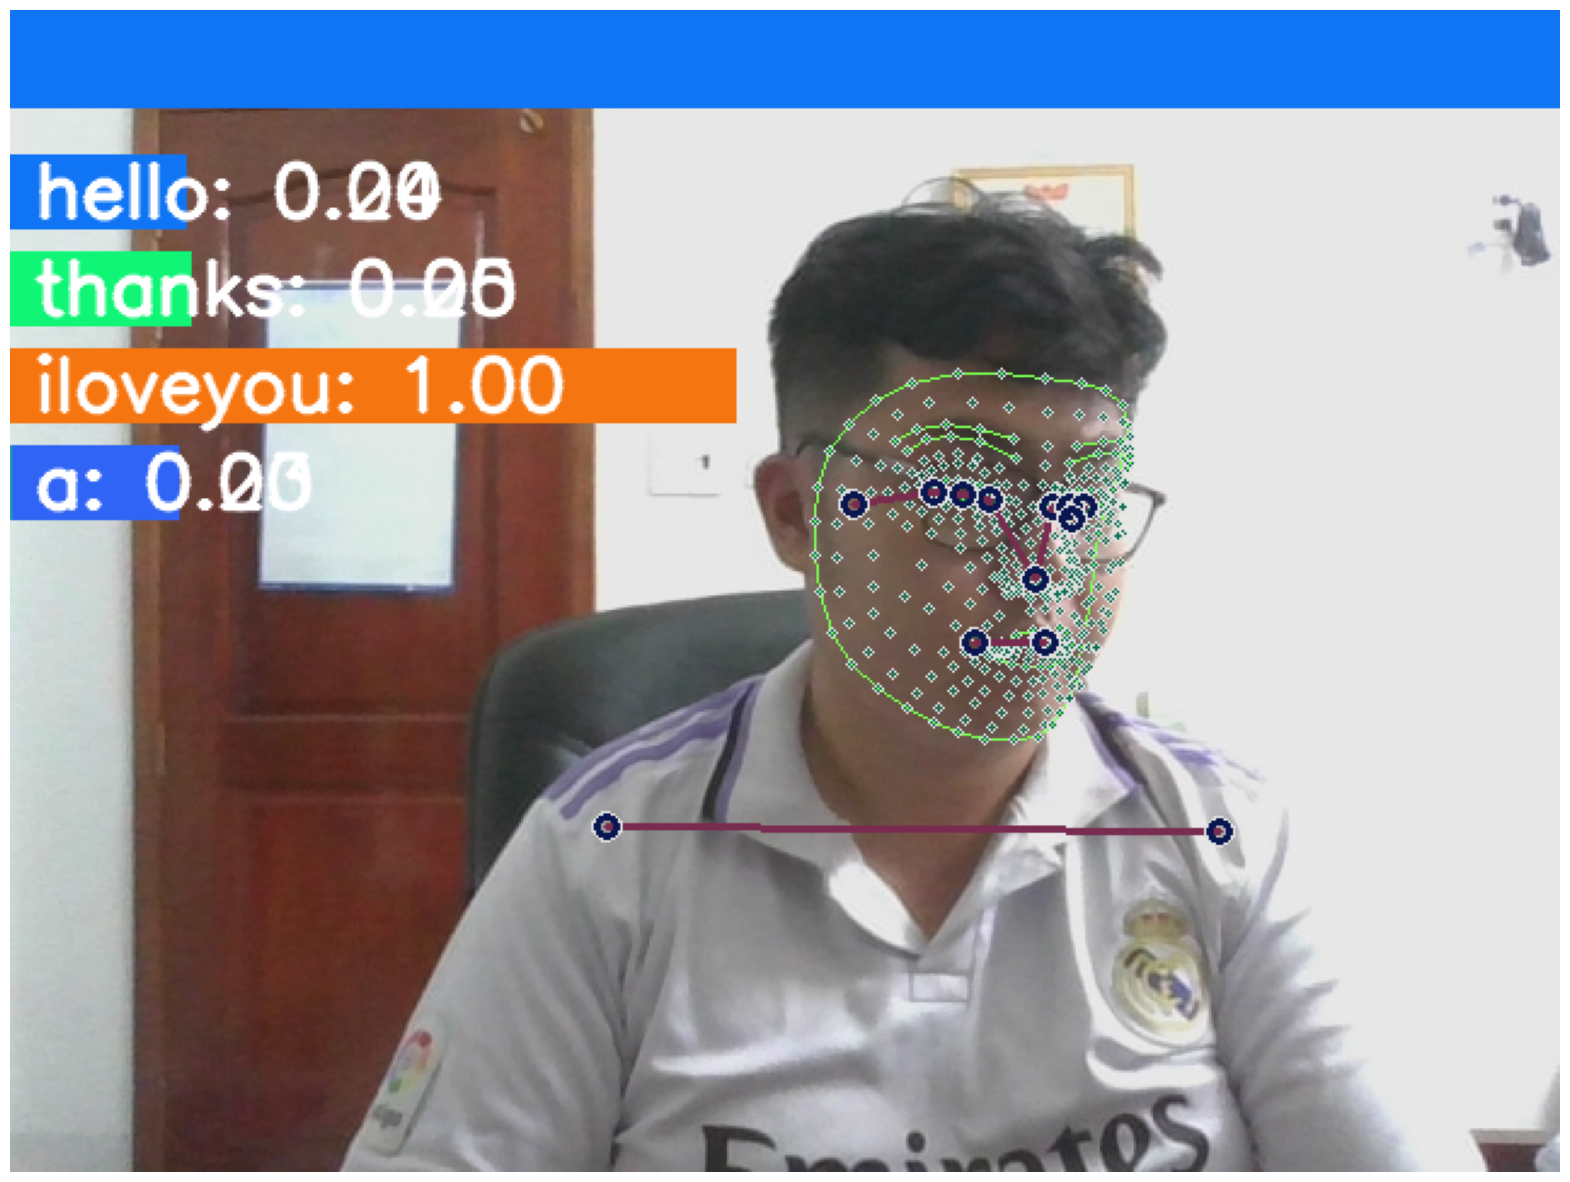

In [224]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [226]:
# # 1. New detection variables
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.8

# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)
        
#         # 2. Prediction logic
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-30:]
        
#         if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
#             predictions.append(np.argmax(res))
            
            
#         #3. Viz logic
#             if np.unique(predictions[-10:])[0]==np.argmax(res): 
#                 if res[np.argmax(res)] > threshold: 
                    
#                     if len(sentence) > 0: 
#                         if actions[np.argmax(res)] != sentence[-1]:
#                             sentence.append(actions[np.argmax(res)])
#                     else:
#                         sentence.append(actions[np.argmax(res)])

#             if len(sentence) > 5: 
#                 sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
#         cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
#         cv2.putText(image, ' '.join(sentence), (3,30), 
#                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [227]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # Lấy nhãn có xác suất cao nhất
            max_idx = np.argmax(res)
            max_action = actions[max_idx]
            max_prob = res[max_idx]

            # Chỉ thêm vào câu khi vượt ngưỡng
            if np.unique(predictions[-10:])[0] == max_idx:
                if max_prob > threshold:
                    if len(sentence) > 0:
                        if max_action != sentence[-1]:
                            sentence.append(max_action)
                    else:
                        sentence.append(max_action)

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # ------------------- Hiển thị đẹp hơn -------------------
            # Hiển thị hành động chính xác nhất ở giữa
            if max_prob > threshold:
                text = f"{max_action.upper()} - {max_prob*100:.1f}%"
                (w, h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
                x = int((image.shape[1] - w) / 2)
                y = int(image.shape[0] - 50)
                cv2.rectangle(image, (x-10, y-h-10), (x+w+10, y+10), (0, 128, 255), -1)
                cv2.putText(image, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 255, 255), 3, cv2.LINE_AA)

            # ------------------- Hiển thị lịch sử hành động -------------------
            cv2.rectangle(image, (0, 0), (640, 40), (50, 50, 50), -1)
            cv2.putText(image, ' | '.join(sentence), (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


1/1 [==============================] - 0s 31ms/step


In [225]:
# sequence = []
# sentence = []
# predictions = []
# threshold = 0.8
# max_frames = 100  # Số frame đầu vào mô hình

# # 2. Bắt đầu video capture
# cap = cv2.VideoCapture(0)
# with mp.solutions.holistic.Holistic(min_detection_confidence=0.5,
#                                     min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         # Xử lý mediapipe
#         image, results = mediapipe_detection(frame, holistic)
#         draw_styled_landmarks(image, results)

#         # 3. Trích xuất keypoints và lưu vào sequence
#         keypoints = extract_keypoints(results)
#         sequence.append(keypoints)
#         sequence = sequence[-max_frames:]  # Giữ tối đa 100 frame

#         # 4. Dự đoán khi đủ 100 frame
#         if len(sequence) == max_frames:
#             res = model.predict(np.expand_dims(sequence, axis=0), verbose=0)[0]
#             predictions.append(np.argmax(res))

#             # Lấy nhãn có xác suất cao nhất
#             max_idx = np.argmax(res)
#             max_action = actions[max_idx]
#             max_prob = res[max_idx]

#             # Chỉ thêm vào câu khi vượt ngưỡng và ổn định
#             if np.unique(predictions[-10:])[0] == max_idx and max_prob > threshold:
#                 if len(sentence) == 0 or max_action != sentence[-1]:
#                     sentence.append(max_action)

#             # Giữ tối đa 5 hành động
#             sentence = sentence[-5:]

#             # ----- Hiển thị hành động chính xác nhất -----
#             if max_prob > threshold:
#                 text = f"{max_action.upper()} - {max_prob*100:.1f}%"
#                 (w, h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
#                 x = int((image.shape[1] - w) / 2)
#                 y = int(image.shape[0] - 50)
#                 cv2.rectangle(image, (x-10, y-h-10), (x+w+10, y+10), (0, 128, 255), -1)
#                 cv2.putText(image, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.2,
#                             (255, 255, 255), 3, cv2.LINE_AA)

#             # ----- Hiển thị lịch sử hành động -----
#             cv2.rectangle(image, (0, 0), (640, 40), (50, 50, 50), -1)
#             cv2.putText(image, ' | '.join(sentence), (10, 30),
#                         cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

#         # Hiển thị
#         cv2.imshow('Real-Time Action Detection', image)

#         # Thoát khi nhấn 'q'
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()